# Import libraries

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
from keras.applications import ResNet50
import tensorflow as tf

In [ ]:
model=ResNet50()
model.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

# Create a list of convolutional layers

In [ ]:
import keras
conv_layer_index= []
for idx, layer in enumerate(model.layers):
 # check for convolutional layer
  if isinstance(layer,keras.layers.Conv2D):
   conv_layer_index.append(idx)
 

# Plot some kernels

conv1_conv (7, 7, 3, 64)


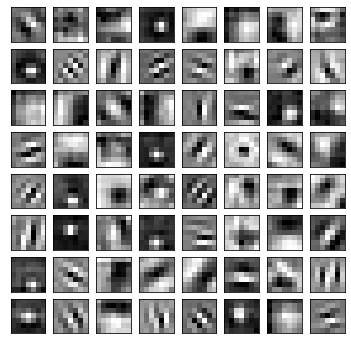

conv2_block1_1_conv (1, 1, 64, 64)


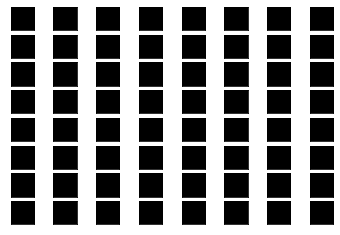

conv2_block1_2_conv (3, 3, 64, 64)


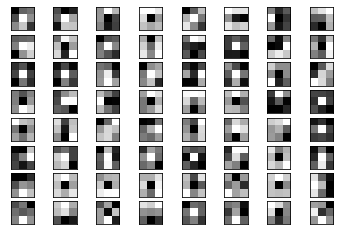

In [ ]:

layer = model.layers
   
fig1=plt.figure(figsize=(6, 6))
columns = 8
rows = 8
n_filters = columns * rows
for i in conv_layer_index[:3]:
  filters, biases = model.layers[i].get_weights()
  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)
  print(layer[i].name, filters.shape)
  for j in range(1, n_filters +1):
      f = filters[:, :, :, j-1]
      fig1 =plt.subplot(rows, columns, j)
      fig1.set_xticks([])  #Turn off axis
      fig1.set_yticks([])
      plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
  plt.show()  

# Plot some outputs of layers

1/1 [==============================] - 0s 119ms/step
(1, 112, 112, 64)


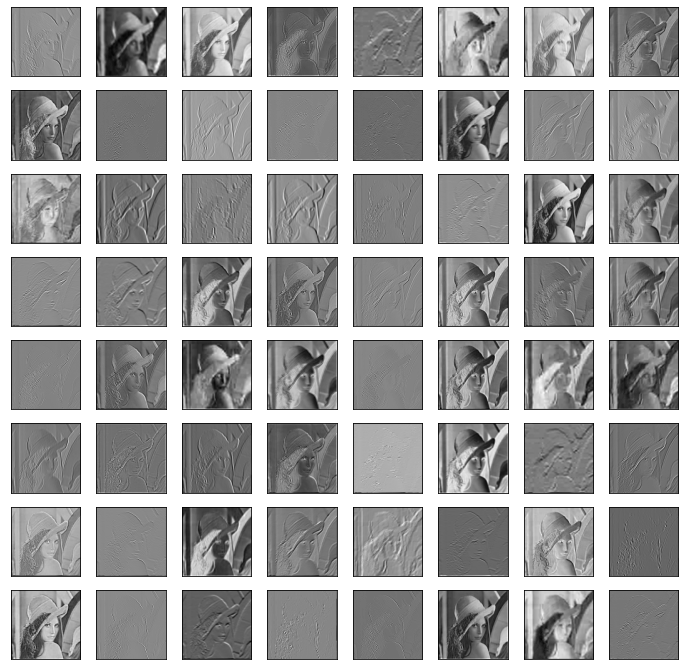

(1, 56, 56, 64)


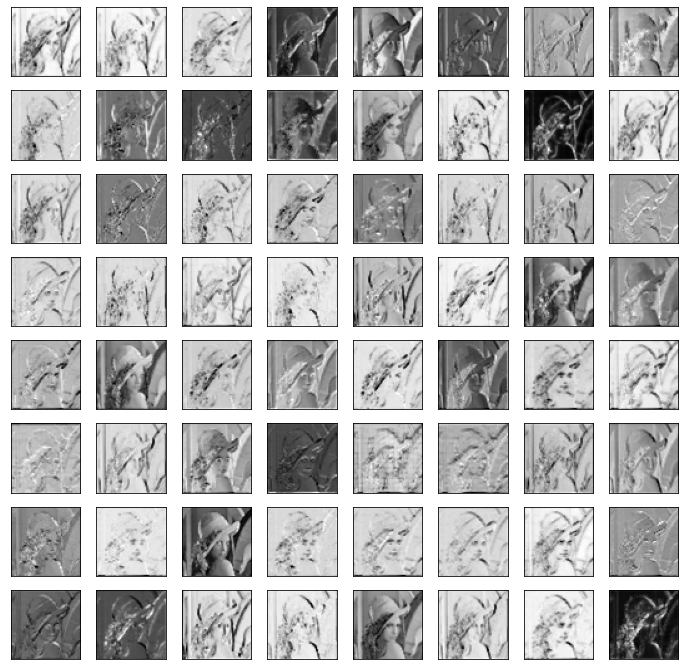

(1, 56, 56, 64)


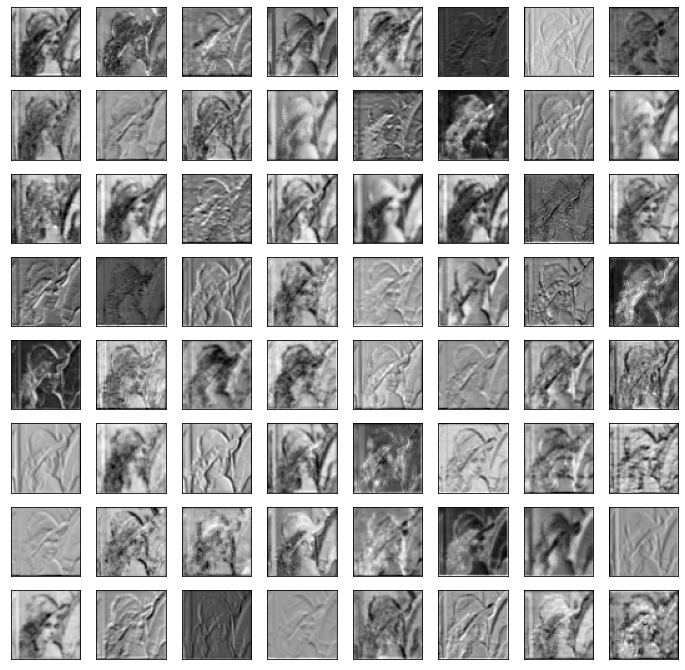

In [ ]:
outputs = [model.layers[i].output for i in conv_layer_index[:3]]
model_short = Model(inputs=model.inputs, outputs=outputs)

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/lena.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)


columns = 8
rows = 8
for ftr in feature_output:
    print(ftr.shape)
    pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        pos += 1
    plt.show()
